<div>
<img style="float:right" width="200" height="60" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwVhdFpMoPv7nNj-KxZdcAr01FQG5M2DmTy0d2jf-3aRk0Kiga5g6mDNJF5vw3M1iFXgs&usqp=CAU">
</div>

# PUBG Exploratory Data Analysis (EDA)
**T5 Data Science Bootcamp**
### Table of Contents
- [Introduction](#Introduction)
- [Part I - Imports](#Imports)
- [Part II - Load Data](#Load)
- [Part III - Data Formating](#Dataformating)
- [Part IV - Exploartory Data Analysis](#Exploartory)
- [Part V - Conclusion](#Conclusion)

## Introduction
This is the first project for the T5 Data Science Bootcamp, which is an exploratory data analysis of the MTA turnstile data set using  Python and its libraries Pandas, NumPy, Matplotlib, and Plotly. Below is a detail about the company I am collaborating with to help them with their problem, the dataset description, and the tools I will be using for the project. 
<br> <br>
I got approached by the company **PUBG Corporation** to find out the strategy to win in PUBG and infer the probability of the team cheating in the game. , I will be answering the questions below.

In this project what we want is analyzing the data and find out what affects the player's win by answering some questions such as:
* How many players are joinded in one match?
* Who is the highest win (Solos, Duos or Squads)?
* What is the amount of work as a team between players?
* What is the average person that kills many players? 
* How many most kills are recorded?
* How many  99% of people kills have? 
* The relationship between kills and headshots Kills?
* How do we catch the fraudsters in the game?
<br>
 Let's let the data do the talking!

<a id='Imports'></a>
# Libraries Imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a id='Load'></a>

# Load data


In [40]:
dft=pd.read_csv("train_V2.csv")
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
dft.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


 <a id='Dataformating'></a>

 # Data Formating

In [75]:
dft[['Id','groupId','matchId','headshotKills','kills','playersJoined']].head()

,Id,groupId,matchId,headshotKills,kills,playersJoined
1505106,8e3a72fab94f0f,fce73629f72811,a185896f8782da,0,3,99
2318087,60b20026c6e8c6,3cf05695cd8ed0,eb81424def83c8,0,4,98
1403568,4d402989ea1a75,8f27c46e927210,cb69723a5013fd,1,3,95
3892644,32cf0721f311fb,8c67ed8d968c5e,5294d9751dff5b,0,1,90
3395279,3df6b3e637784e,23d6178e9e1055,d6029081e91fc6,4,6,92


In [42]:
## summary of columns data types 
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [43]:
# describe dataset 
dft.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [44]:
# dataset shape
print('shape of the dataset=', dft.shape)

shape of the dataset= (4446966, 29)


In [45]:
# detect unique data in columns
dft.nunique()

Id                 4446966
groupId            2026745
matchId              47965
assists                 20
boosts                  27
damageDealt          29916
DBNOs                   39
headshotKills           34
heals                   63
killPlace              101
killPoints            1707
kills                   58
killStreaks             18
longestKill          28284
matchDuration         1267
matchType               16
maxPlace               100
numGroups              100
rankPoints            2262
revives                 25
rideDistance         33562
roadKills               14
swimDistance         28345
teamKills               11
vehicleDestroys          6
walkDistance         38599
weaponsAcquired         97
winPoints             1447
winPlacePerc          3000
dtype: int64

In [46]:
# how many duplicats in the data
dft.duplicated().sum()

0

In [47]:
# show the null coloumn
dft[dft['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [52]:
# delete null row
dft.drop(2744604, inplace=True)

######  What has happened so far is an attempt to explore and understand the data further, and find out which problems are in it and need cleaning


 <a id='Exploartory'></a>
# Exploartory Data Analysis

 How many players are joinded in one match?

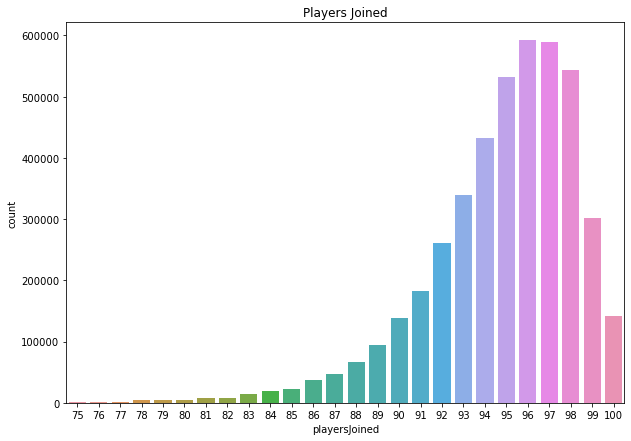

In [57]:
# playersJoined
dft['playersJoined'] = dft.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(10,7))
sns.countplot(dft[dft['playersJoined']>=75]['playersJoined'])
plt.title('Players Joined')
plt.show()

In [58]:
# Unique row in Id, groupId, matchId
for c in ['Id','groupId','matchId']:
    print(f'unique [{c}] count:', dft[c].nunique())

unique [Id] count: 4446965
unique [groupId] count: 2026744
unique [matchId] count: 47964


In [59]:
dft.matchType.value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

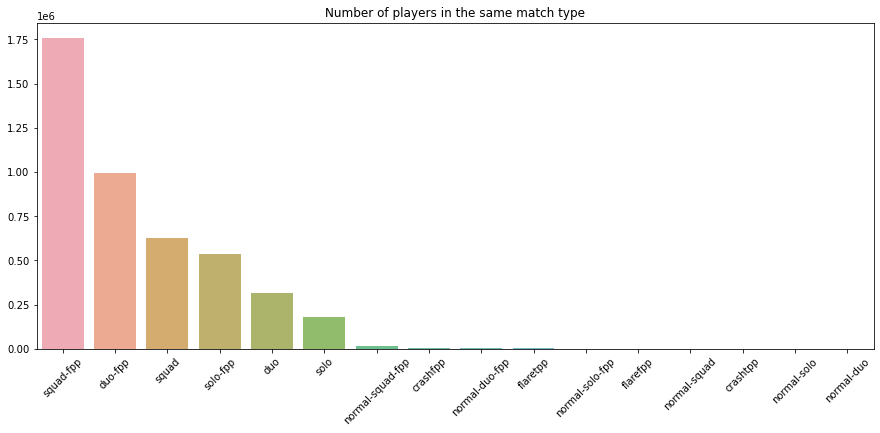

In [60]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
ax = sns.barplot(dft.matchType.value_counts().index, dft.matchType.value_counts().values, alpha=0.8)
ax.set_title("Number of players in the same match type")
plt.show()

#### Now we will make it only 4 types [solo,duo,squad,others]

In [61]:
dft.matchType.replace(['squad-fpp','squad','normal-squad-fpp','normal-squad'],'squad',inplace=True)

In [62]:
dft.matchType.replace(['duo-fpp','normal-duo-fpp','normal-duo'],'duo',inplace=True)

In [63]:
dft.matchType.replace(['solo-fpp','normal-solo-fpp','normal-solo'],'solo',inplace=True)

In [64]:
dft.matchType.replace(['crashfpp','flaretpp','flarefpp','crashtpp'],'others',inplace=True)

In [65]:
dft.matchType.value_counts()

squad     2400402
duo       1315970
solo       720712
others       9881
Name: matchType, dtype: int64

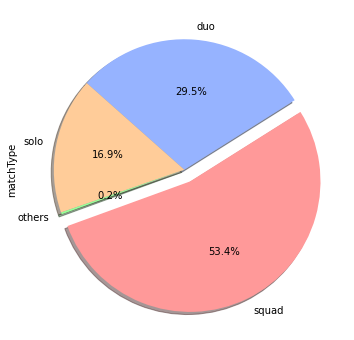

In [66]:
explode = (0.1, 0, 0, 0)
fig, ax = plt.subplots(1, figsize=(10, 6))
colors = ['#ff9999','#96b3ff','#ffcc99','#99ff99']
dft.groupby('matchId')['matchType'].first().value_counts().plot.pie(explode=explode,shadow=True,
                                                                    autopct='%1.1f%%',startangle=200,colors=colors );

 we can say that more than 50% of players play as a (squad)

How many most kills are recorded?

In [67]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players'.format(dft['kills'].mean()))
print('50% of people have ',dft['kills'].quantile(0.50),' kills or less')
print('75% of people have ',dft['kills'].quantile(0.75),' kills or less')
print('99% of people have ',dft['kills'].quantile(0.99),' kills or less')
print('while the most kills recorded in the data is', dft['kills'].max())

The average person kills 0.9248 players
50% of people have  0.0  kills or less
75% of people have  1.0  kills or less
99% of people have  7.0  kills or less
while the most kills recorded in the data is 72


 How many  99% of people kills have? 

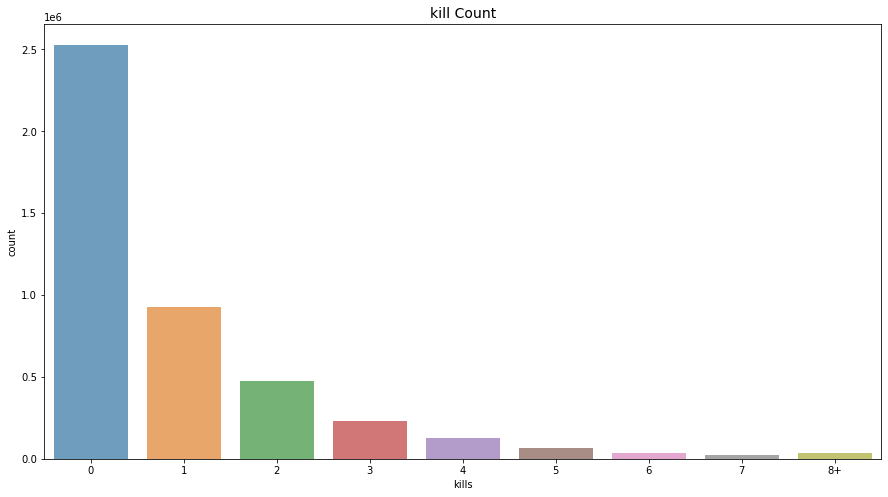

In [68]:
data = dft.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,8))
sns.countplot(data['kills'].astype(str).sort_values(),alpha=0.7)
plt.title("kill Count", fontsize=14)
plt.show()

### It seems most of the people cannot even make a single kill. 

In [69]:
####  use of automated aiming software is without a doubt one of the most powerful cheats that can be used in Playerunknowns Battlegrounds at this time.
#### Calculating the total Distance travelled by a player which is the sum total of rideDistance, walkDistance and swimDistance

In [70]:
dft['_totalDistance'] = dft['rideDistance'] + dft['walkDistance'] + dft['swimDistance']

In [71]:
dft['_totalDistance'] 

0           244.8000
1          1445.0445
2           161.8000
3           202.7000
4            49.7500
             ...    
4446961    2311.0000
4446962      81.7000
4446963     790.8840
4446964    2748.0000
4446965    2613.0000
Name: _totalDistance, Length: 4446965, dtype: float64

In [72]:
#Killing without Moving
#Identify the fraudsters who can making kills without even moving.
dft['_killsWithoutMoving'] = ((dft['kills'] > 20) & (dft['_totalDistance'] ==0))
# Check players who kills without moving
display(dft[dft['_killsWithoutMoving']==True].shape)
dft.loc[dft._killsWithoutMoving==True,['Id','kills','playersJoined','_totalDistance','_killsWithoutMoving' ]].head(10)

(46, 32)

,Id,kills,playersJoined,_totalDistance,_killsWithoutMoving
125753,8f02d08857012d,25,16,0.0,True
132050,f156862af94749,21,24,0.0,True
269922,7bfaeb8870182a,24,47,0.0,True
407851,1257531f104b2e,21,24,0.0,True
422093,96751e22e536ac,30,7,0.0,True
425984,59df1590389334,27,47,0.0,True
623076,938c3b2dc0482f,21,28,0.0,True
705820,a20dac24dcea3f,21,17,0.0,True
863538,4c8ce643f804d3,26,15,0.0,True
954479,be3de011801fc2,26,23,0.0,True


In [73]:
# taking a subset of data for plotting
dft = dft.sample(30_000)

In [74]:
fig = px.scatter(dft, x = "headshotKills", y = "kills",color="winPlacePerc",
                 size="headshotKills",hover_name="Id")
fig.show()

Conclusions
After analyzing and understanding the data, the following conclusion emerged:

Between 96 to 97 players join in each match and the more you play in a team, the higher your chance of winning and finding help for other chances, the average number of kills is 4, so you are at risk of losing if the opponent kills more than you, you must develop your killing skills, We also found a way to detect cheaters in the game.